In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import cptac
import cnvutils

In [2]:
CHROMOSOME = '8'
ARM = 'p'
EVENT_START = 0
EVENT_END = 30794385

In [3]:
data = pd.read_csv('pearson_cis_effect_results_8p.tsv', sep='\t')

In [4]:
data_long = data.melt(id_vars=['Name'])
data_long[['cancer', 'type', 'omics']] = data_long.variable.str.split('_', expand=True)

In [5]:
data_long.dropna(inplace=True)

In [40]:
sig_pvalues = data_long[(data_long.type == 'rvalue') & (data_long.omics == 'proteomics') & (data_long.value >= 0.5)]
non_sig_pvalues = data_long[(data_long.type == 'rvalue') & (data_long.omics == 'proteomics') & (data_long.value <= 0.1)]

In [41]:
sig_genes = dict()
all_types = None
for cancer_type in sig_pvalues.cancer.unique():
    df = sig_pvalues[(sig_pvalues.cancer==cancer_type)]
    df_genes = set(df.Name)
    if all_types == None:
        all_types = df_genes
    else:
        all_types = all_types & df_genes
    sig_genes[cancer_type] = list(df_genes)
sig_genes['all'] = list(all_types)

In [42]:
non_sig_genes = dict()
all_types = None
for cancer_type in non_sig_pvalues.cancer.unique():
    df = non_sig_pvalues[(non_sig_pvalues.cancer==cancer_type)]
    df_genes = set(df.Name)
    if all_types == None:
        all_types = df_genes
    else:
        all_types = all_types & df_genes
    non_sig_genes[cancer_type] = list(df_genes)
non_sig_genes['all'] = list(all_types)

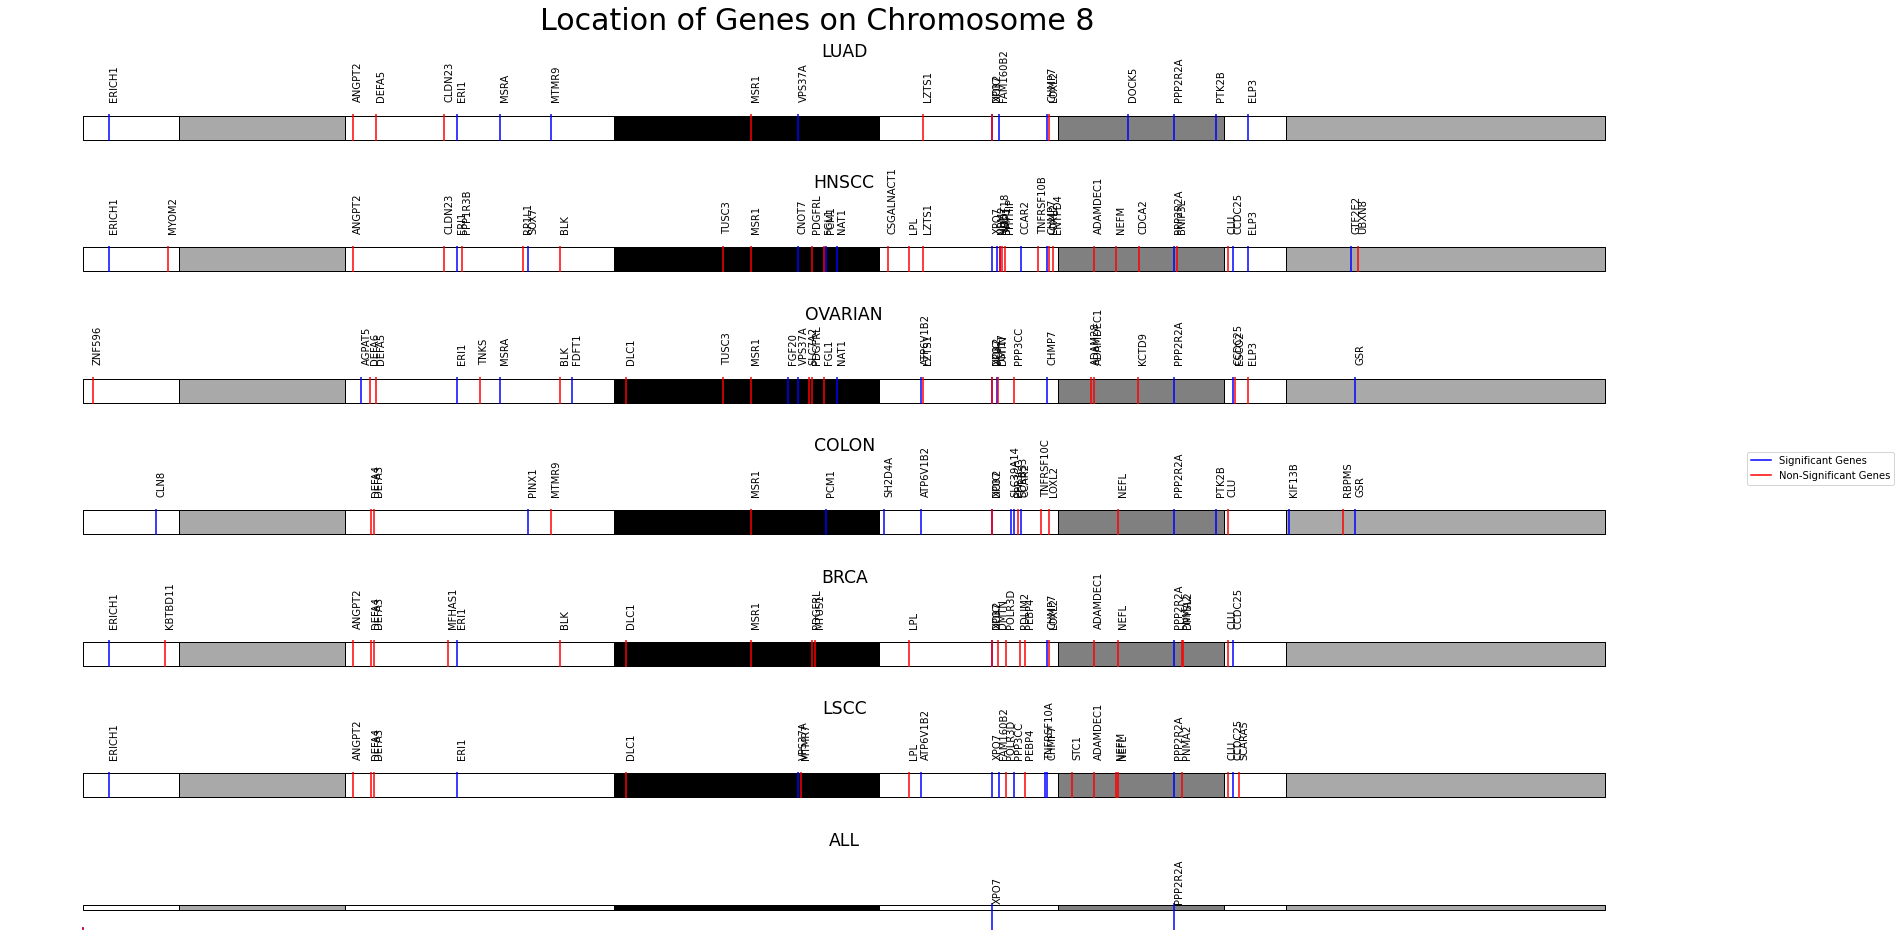

In [43]:
fig, axs = plt.subplots(nrows=7, sharex=True, figsize=(30,15))
count = 0
for cancer_type in sig_genes.keys():
    ax = axs[count]
    ax.set_frame_on(False)
    ax.get_yaxis().set_visible(False)
    ax.get_xaxis().set_visible(False)
    cnvutils.make_chromosome_plot(CHROMOSOME, arm=ARM, start_bp=EVENT_START, end_bp=EVENT_END, genes={'blue': sig_genes[cancer_type], 'red': non_sig_genes[cancer_type]}, title=cancer_type.upper(), ax=ax)
    count += 1
plt.subplots_adjust(hspace=4)
fig.suptitle("Location of Genes on Chromosome 8", size=30)
line_up = plt.plot([1,2,3], color='blue', label="Significant Genes")
line_down = plt.plot([3,2,1], color='red', label="Non-Significant Genes")
fig.legend(handles=line_up+line_down, loc='center right')